In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pyFTS.benchmarks import Measures
import math
from pyFTS.common import Util
import datetime
import statistics

In [2]:
df = pd.read_csv('/home/hugo/projetos-doutorado/Appliance-Energy-Prediction/data/energydata_complete.csv')
#df.pop('date')
df.pop('rv1')
df.pop('rv2')
df.index = df.date
df.index.freq = "QS-OCT"
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
2016-05-27 17:30:00,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
2016-05-27 17:40:00,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667


In [3]:
train_percentage = round(0.75*len(df))
train = df[0:train_percentage]
test = df[train_percentage:len(df)]

In [4]:
# Variables
endog=train['Appliances']
exog=train.loc[:,'Appliances':'Tdewpoint']

In [5]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Appliances   No. Observations:                14801
Model:               SARIMAX(1, 0, 1)   Log Likelihood              156797.607
Date:                Mon, 07 Jun 2021   AIC                        -313537.214
Time:                        22:20:55   BIC                        -313316.743
Sample:                    01-11-2016   HQIC                       -313464.017
                         - 04-23-2016                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Appliances      1.0000   2.29e-10   4.36e+09      0.000       1.000       1.000
lights      -1.334e-15   6.81e-12     -0.000      1.000   -1.34e-11    1.34e-11
T1           1.286e-15   2.83e-12      0.000    

In [6]:
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

In [7]:
predict_ci

,lower Appliances,upper Appliances
2016-01-11 17:00:00,59.998986,60.001014
2016-01-11 17:10:00,59.999980,60.000020
2016-01-11 17:20:00,49.999980,50.000020
2016-01-11 17:30:00,49.999980,50.000020
2016-01-11 17:40:00,59.999980,60.000020
...,...,...
2016-04-23 11:00:00,369.999980,370.000020
2016-04-23 11:10:00,399.999980,400.000020
2016-04-23 11:20:00,299.999980,300.000020
2016-04-23 11:30:00,299.999980,300.000020


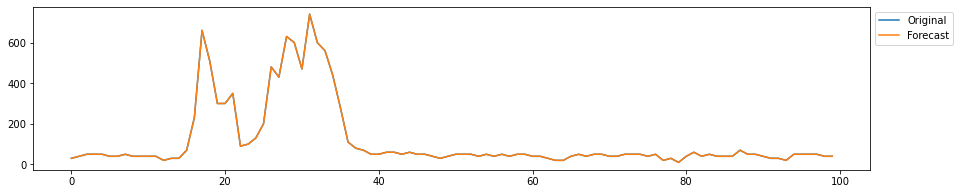

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
ax.plot(train['Appliances'].values[1000:1100], label='Original')
ax.plot(predict_ci['upper Appliances'].values[1000:1100], label='Forecast')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
plt.show()

In [9]:
# df['passengers'],order=(1, 0, 1),
#               seasonal_order=(2, 1, 0, 12),
#               enforce_stationarity=False,
#               enforce_invertibility=False)

#model=sm.tsa.SARIMAX(endog=train['Appliances'],exog=train.loc[:,'Appliances':'Tdewpoint'],order=[3,1,1])
model=sm.tsa.SARIMAX(endog=train['Appliances'],exog=train.loc[:,'Appliances':'Tdewpoint'],
        order=(1, 0, 1),
        seasonal_order=(2, 1, 0, 12),
        enforce_stationarity=False,
        enforce_invertibility=False)

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'


In [10]:
sarimax = model.fit()

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Appliances   No. Observations:                14801
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood              156409.521
Date:                             Tue, 08 Jun 2021   AIC                        -312757.042
Time:                                     00:17:18   BIC                        -312521.443
Sample:                                 01-11-2016   HQIC                       -312678.813
                                      - 04-23-2016                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Appliances      1.0000   1.69e-21   5.91e+20      0.000       1.000       1.000
lights      -2.864e-16      6e-24  -4.77e+07      0.000   -2.86e-16   -2.86e-16
T1            7.28e-15   1.05e-25    6.9e+10      0.000    7.28e-15    7.28e-15
RH_1        -5.384e-16   8.37e-25  -6.43e+08      0.000   -5.38e-16   -5.38e-16
T2           1.819e-15   7.69e-25   2.37e+09      0.000    1.82e-15    1.82e-15
RH_2         1.505e-15    1.6e-24   9.44e+08      0.000    1.51e-15    1.51e-15
T3           5.014e-15   8.14e-26   6.16e+10      0.000    5.01e-15    5.01e-15
RH_3         1.667e-15   5.92e-26   2.81e+10      0.000    1.67e-15    1.67e-15
T4          -1.054e-15   1.58e-25  -6.69e+09      0.000   -1.05e-15   -1.05e-15
RH_4          8.97e-16   1.14e-25   7.87e+09      0.000    8.97e-16    8.97e-16
T5          -1.427e-15   4.95e-26  -2.88e+10      0.000   -1.43e-15   -1.43e-15
RH_5        -2.156e-16   1.72e-24  -1.25e+08      0.000   -2.16e-16   -2.16e-16
T6           2.274e-15   2.94e-24   7.73e+08      0.000    2.27e-15    2.27e-15
RH_6        -6.776e-17   1.03e-23  -6.58e+06      0.000   -6.78e-17   -6.78e-17
T7           3.566e-15   1.99e-25   1.79e+10      0.000    3.57e-15    3.57e-15
RH_7        -1.282e-15   1.32e-24  -9.69e+08      0.000   -1.28e-15   -1.28e-15
T8          -1.126e-15   1.75e-25  -6.44e+09      0.000   -1.13e-15   -1.13e-15
RH_8         8.283e-16    2.1e-24   3.94e+08      0.000    8.28e-16    8.28e-16
T9            2.05e-15   5.06e-26   4.05e+10      0.000    2.05e-15    2.05e-15
RH_9        -3.022e-15   1.29e-24  -2.35e+09      0.000   -3.02e-15   -3.02e-15
T_out       -2.398e-15   2.55e-24  -9.42e+08      0.000    -2.4e-15    -2.4e-15
Press_mm_hg -5.446e-16   1.98e-25  -2.75e+09      0.000   -5.45e-16   -5.45e-16
RH_out      -3.088e-15   1.08e-23  -2.87e+08      0.000   -3.09e-15   -3.09e-15
Windspeed   -3.368e-16   8.02e-25   -4.2e+08      0.000   -3.37e-16   -3.37e-16
Visibility   2.554e-17   3.99e-25   6.41e+07      0.000    2.55e-17    2.55e-17
Tdewpoint      1.7e-14   4.47e-25   3.81e+10      0.000     1.7e-14     1.7e-14
ar.L1           0.5723    7.3e-25   7.84e+23      0.000       0.572       0.572
ma.L1           0.1848   6.34e-25   2.91e+23      0.000       0.185       0.185
ar.S.L12       -0.2700   1.37e-24  -1.98e+23      0.000      -0.270      -0.270
ar.S.L24       -0.1007   1.96e-24  -5.14e+22      0.000      -0.101      -0.101
sigma2           1e-10   1.63e-11      6.131      0.000     6.8e-11    1.32e-10
===================================================================================
Ljung-Box (L1) (Q):                 132.13   Jarque-Bera (JB):             69569.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:              

In [12]:
start = len(train)
end = len(train)+ len(test) -1

In [13]:
forecasts = sarimax.predict(start=start, end=end, exog=test, typ='linear')

ValueError: Provided exogenous values are not of the appropriate shape. Required (4934, 26), got (4934, 27).

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
ax.plot(test['Appliances'].values[1000:1100], label='Original')
ax.plot(forecasts.values[1000:1100], label='Forecast')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
plt.show()

# plt.plot(forecasts.values[1000:1100])
# plt.plot(test['Appliances'].values[1000:1100])

In [ ]:
Measures.rmse(forecasts.values, test['Appliances'].values)

In [ ]:
test

In [ ]:
def train_arima(train, order):
    model=sm.tsa.SARIMAX(endog=train['Appliances'],exog=train.loc[:,'Appliances':'Tdewpoint'],order=[3,1,1])
    arima = model.fit()
    return arima


def predict_arima(model,start,end,test):
    forecasts = model.predict(start=start, end=end, exog=test, typ='linear')
    return forecasts
    

In [20]:
forecasts = []
appliances = []
result = {
     "window": [],
     "rmse": [],
     "mape": [],
     "smape": []
}

tam = len(df)
n_windows = 30
windows_length = math.floor(tam / n_windows)
for ct, ttrain, ttest in Util.sliding_window(df, windows_length, 0.75, inc=1):
    if len(ttest) > 0:
        start = len(ttrain)
        end = len(ttrain)+ len(ttest) -1
        appliance = ttest['Appliances'].reset_index()
        print('-' * 20)
        print(f'training window {(ct)}')
        model = train_arima(ttrain, [1,1,1])
        forecast = predict_arima(model, start, end, ttest)
        
        print("[{0: %H:%M:%S}]".format(datetime.datetime.now()) + f" getting statistics")
        appliance.pop('index')
        appliances = [i[0] for i in appliance.values]
        rmse = Measures.rmse(appliances,forecast)
        mape = Measures.mape(appliances,forecast)
        smape = Measures.smape(appliances,forecast)
        
        forecasts.append(forecast)
        appliances.append(appliances)
        
        result["rmse"].append(rmse)
        result["mape"].append(mape)
        result["smape"].append(smape)
        result["window"].append(ct)

measures = pd.DataFrame(result)



--------------------
training window 0


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:34] getting statistics
--------------------
training window 657


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:36] getting statistics
--------------------
training window 1314


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:38] getting statistics
--------------------
training window 1971


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:41] getting statistics
--------------------
training window 2628


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:43] getting statistics
--------------------
training window 3285


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:45] getting statistics
--------------------
training window 3942


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:47] getting statistics
--------------------
training window 4599


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:49] getting statistics
--------------------
training window 5256


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:52] getting statistics
--------------------
training window 5913


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:54] getting statistics
--------------------
training window 6570


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:56] getting statistics
--------------------
training window 7227


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:56:58] getting statistics
--------------------
training window 7884


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:01] getting statistics
--------------------
training window 8541


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:04] getting statistics
--------------------
training window 9198


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:07] getting statistics
--------------------
training window 9855


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:10] getting statistics
--------------------
training window 10512


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:13] getting statistics
--------------------
training window 11169


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:15] getting statistics
--------------------
training window 11826


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:18] getting statistics
--------------------
training window 12483


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:20] getting statistics
--------------------
training window 13140


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:22] getting statistics
--------------------
training window 13797


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:25] getting statistics
--------------------
training window 14454


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:28] getting statistics
--------------------
training window 15111


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:31] getting statistics
--------------------
training window 15768


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:34] getting statistics
--------------------
training window 16425


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:36] getting statistics
--------------------
training window 17082


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:38] getting statistics
--------------------
training window 17739


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:40] getting statistics
--------------------
training window 18396


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 22:57:43] getting statistics
--------------------
training window 19053
[ 22:57:46] getting statistics


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
measures

,window,rmse,mape,smape
0,0,1.687548e-13,1.660851e-13,8.304253e-14
1,657,2.653660e-13,4.067673e-13,2.033837e-13
2,1314,2.196759e-13,2.859346e-13,1.429673e-13
3,1971,3.129045e-13,7.223426e-13,3.611713e-13
4,2628,4.031425e-13,4.452538e-13,2.226269e-13
5,3285,3.174227e-13,3.665181e-13,1.832591e-13
6,3942,9.112004e-13,1.142202e-12,5.711010e-13
7,4599,2.071771e-13,2.672968e-13,1.336484e-13
8,5256,3.345277e-13,5.226284e-13,2.613142e-13
9,5913,1.414564e-13,1.738605e-13,8.693025e-14


In [22]:
print("Mean: ")
print(statistics.mean(measures['rmse']))
print(statistics.mean(measures['mape']))
print(statistics.mean(measures['smape']))

Mean: 
2.580285463457015e-13
3.532100223191663e-13
1.76605011159583e-13
